# Exploratory Data Analysis

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
# Load the data
train = pd.read_csv("C:/Users/Predator/Desktop/Lauti/Programación/GitHub/3. Machine Leaning/#1/Datasets/hospitalizaciones_train.csv")
test = pd.read_csv("C:/Users/Predator/Desktop/Lauti/Programación/GitHub/3. Machine Leaning/#1/Datasets/hospitalizaciones_test.csv")


In [80]:
# Examine the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [81]:
# Check for missing values
train.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

In [82]:
# Describe the numerical variables
train.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000


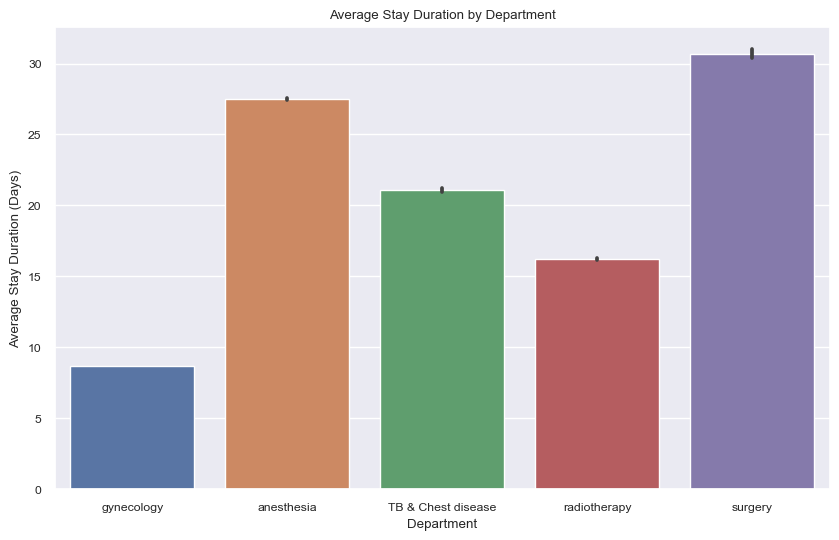

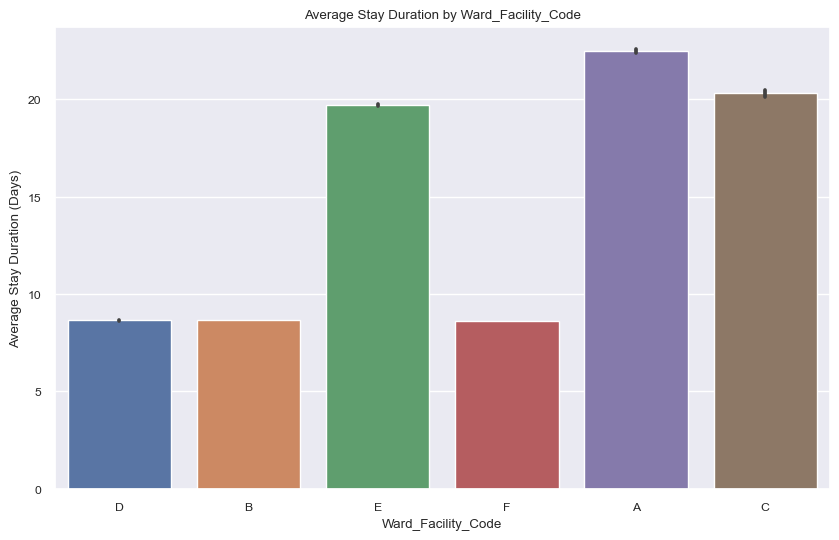

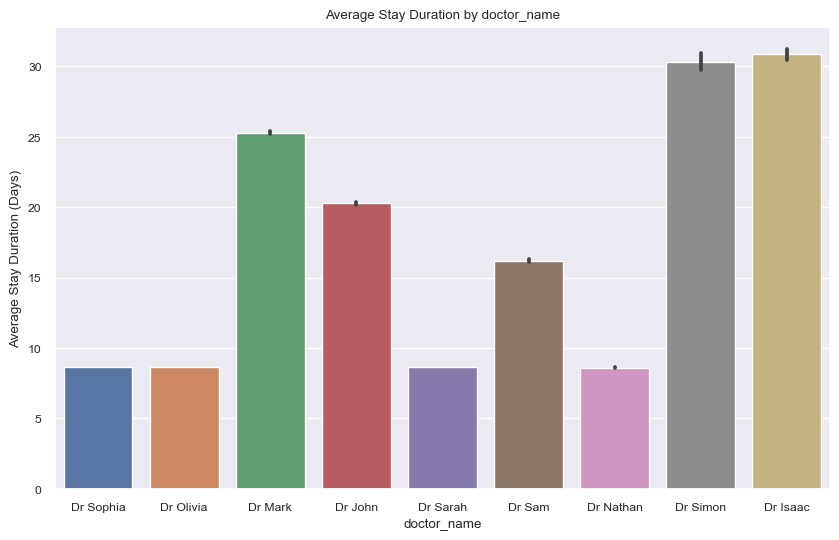

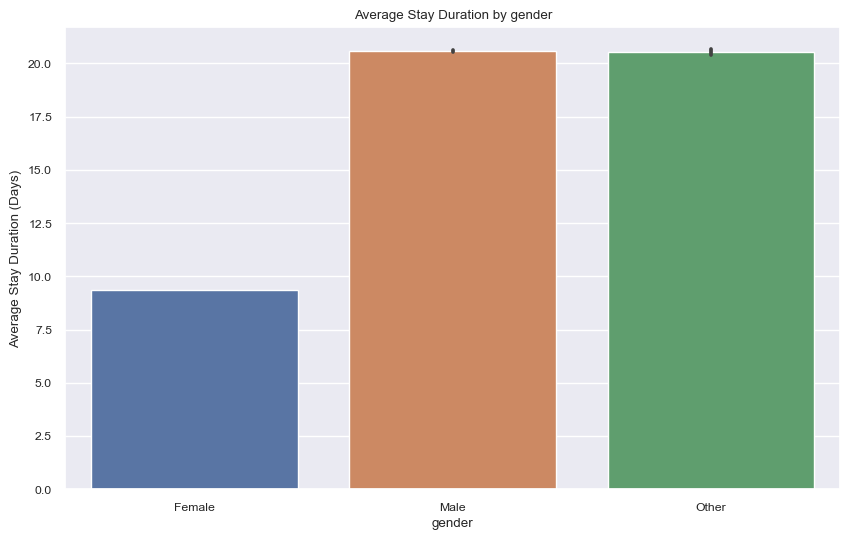

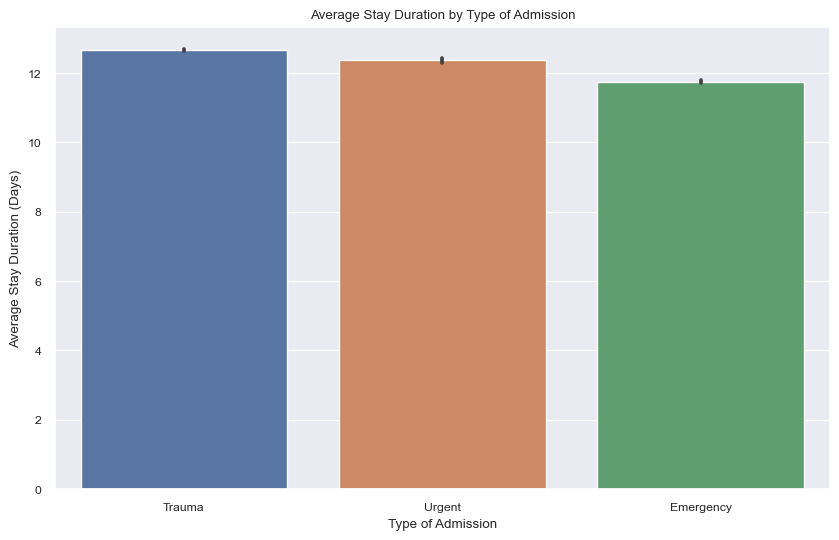

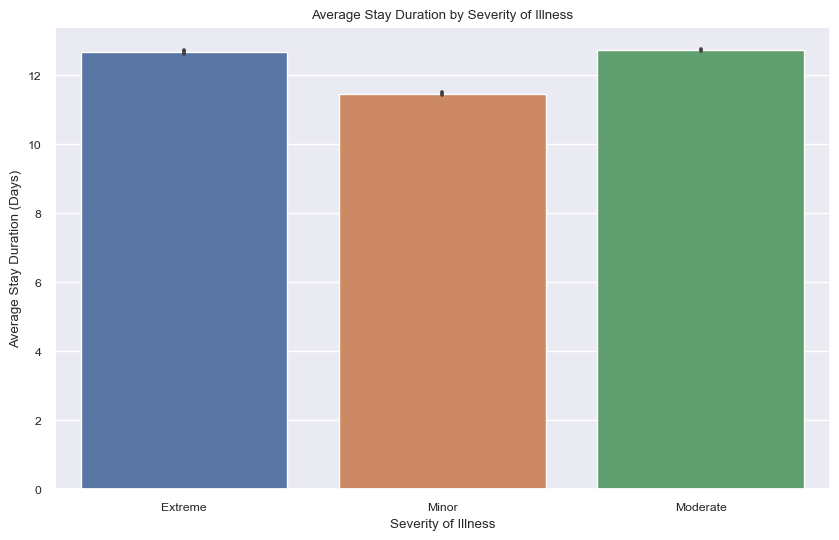

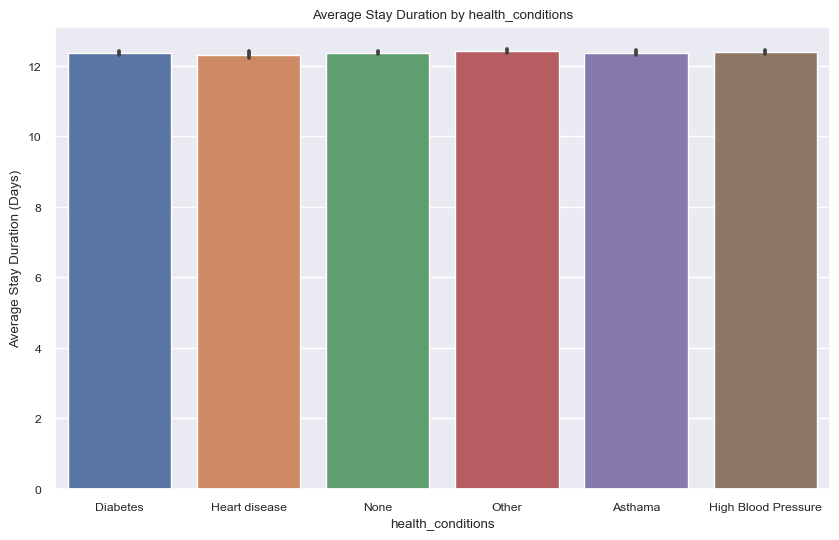

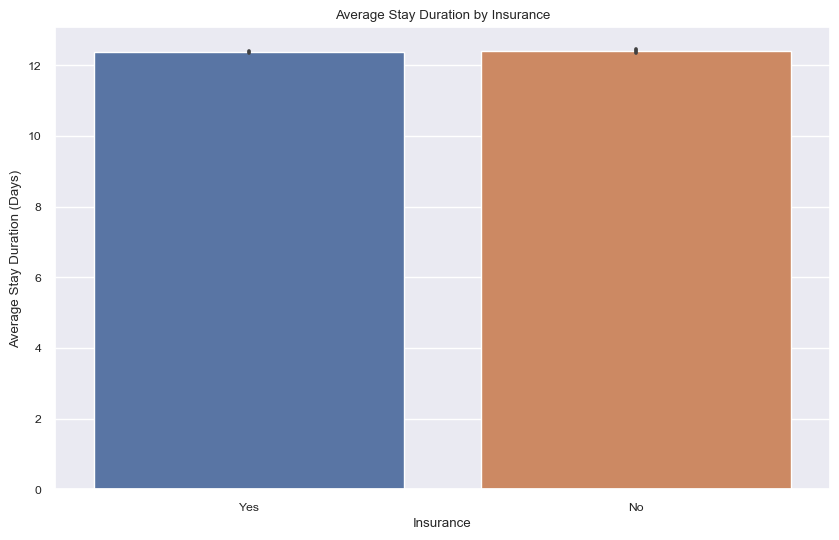

In [84]:
# Define a function to generate bar plots for each categorical variable
def plot_categorical(train, col):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(x=col, y='Stay (in days)', data=train)
    ax.set_title(f"Average Stay Duration by {col}")
    ax.set_ylabel("Average Stay Duration (Days)")
    ax.set_xlabel(f"{col}")
    plt.show()

# Generate plots for each categorical variable
categorical_cols = ['Department', 'Ward_Facility_Code', 'doctor_name', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance']
for col in categorical_cols:
    plot_categorical(train, col)

In [85]:
# Create a categorical variable for prolonged hospital stay
train["prolonged_stay"] = np.where(train["Stay (in days)"] > 8, 1, 0)

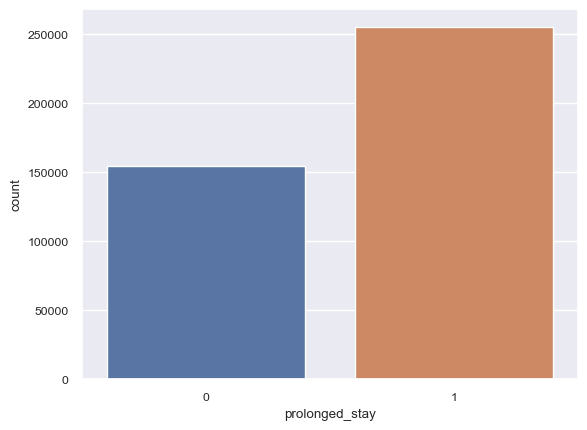

In [86]:
# Explore the relationship between the target variable and other features
sns.countplot(x="prolonged_stay", data=train)
plt.show()

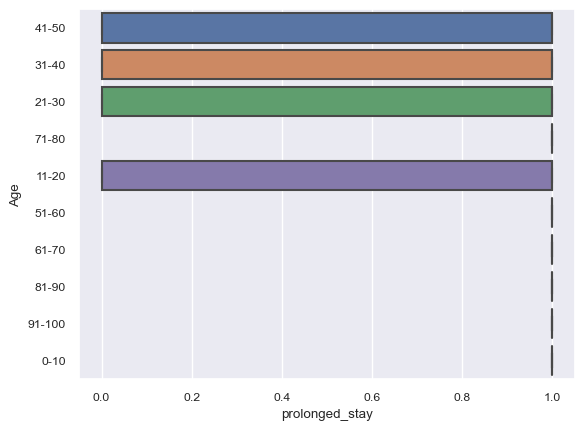

In [87]:
sns.boxplot(x="prolonged_stay", y="Age", data=train)
plt.show()

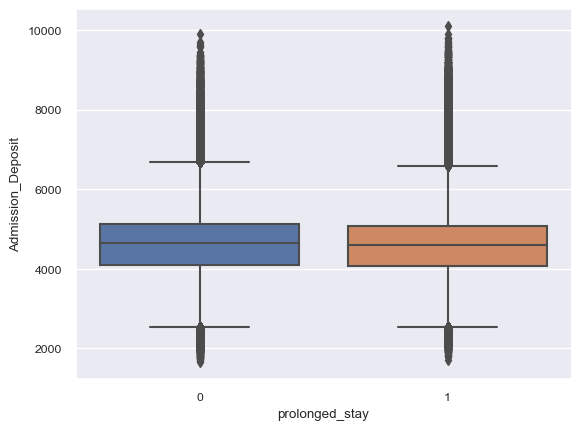

In [88]:
sns.boxplot(x="prolonged_stay", y="Admission_Deposit", data=train)
plt.show()

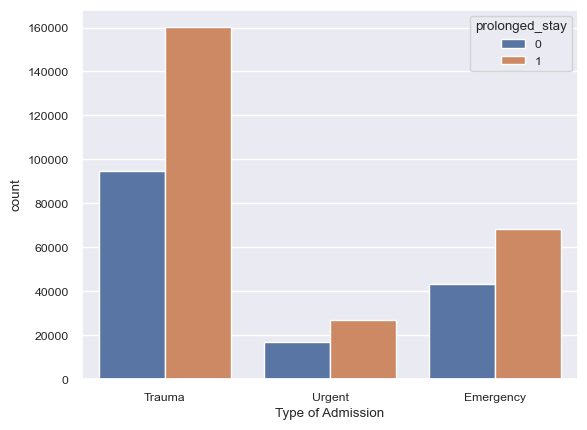

In [89]:
sns.countplot(x="Type of Admission", hue="prolonged_stay", data=train)
plt.show()

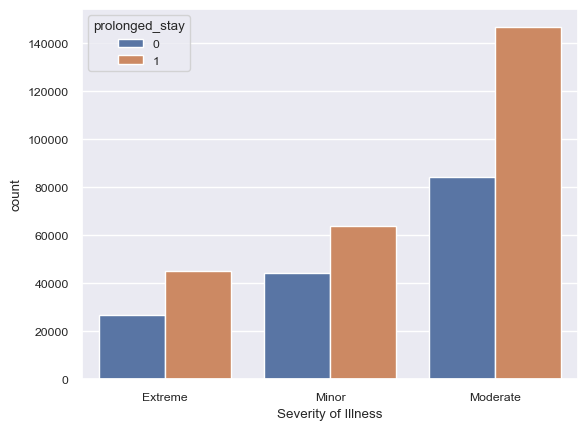

In [90]:
sns.countplot(x="Severity of Illness", hue="prolonged_stay", data=train)
plt.show()